<a href="https://colab.research.google.com/github/kawtarOu/building-ETL-pipeline-with-Pyspark/blob/main/ETL_with_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Building ETL Pipeline with Pyspark`***

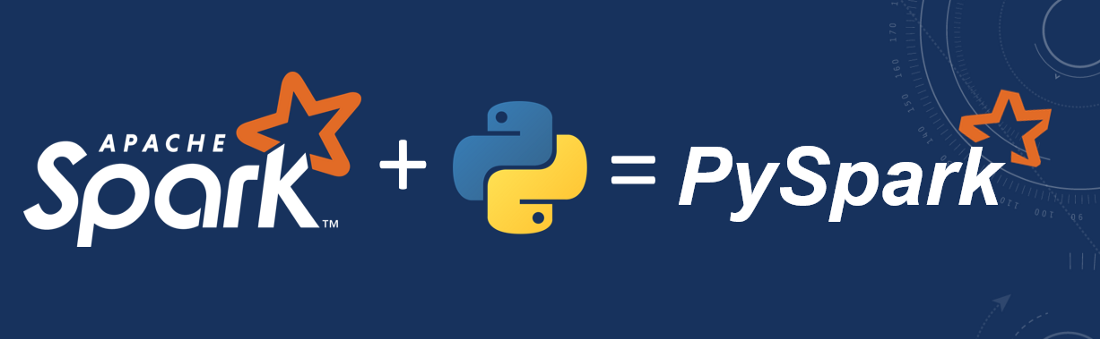

PySpark is a Python API for Apache Spark. Apache Spark is an analytics engine for large-scale data processing. It is a distributed data processing engine, meaning it runs on a cluster. A Cluster consists of three or more nodes (or computers). Spark is written in Scala, but it provides APIs for other mainstream languages such as Java, Python and R — PySpark is the Python API.

It also supports other tools and languages including Spark SQL for SQL, pandas API on Spark for pandas workloads, and Structured Streaming for incremental computation and stream processing.

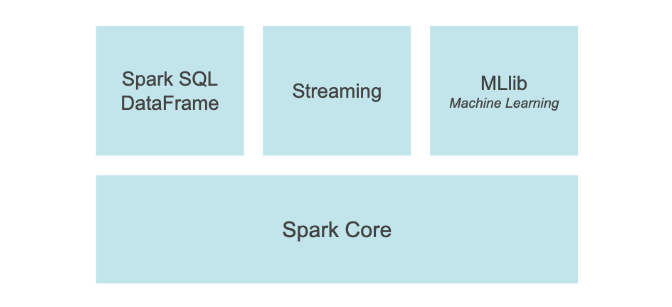

This PySpark tutorial will enable you to:

Setup a PySpark development environment
Read data from flat files into Dataframe
Perform DataFrame operations using Pandas API on Spark
Use Spark-SQL to query the dataset
Persist DataFrame to a PostgreSQL database.

**Pyspark Architecture**

Apache Spark has a master/slave architecture where the master is called the “Driver” and slaves are called “Workers”.

It is a cluster-based system and consists of a Driver and multiple Workers. In the master node of a cluster, we have the driver program that creates the Spark Context. SparkContext coordinates the processes on the cluster. It schedules the execution of jobs and connects to the cluster manager. A Cluster Manager allocates resources across the spark application. Once connected, Spark acquires executors on the worker nodes in the cluster, which are the processes that run computations and store data for our application.

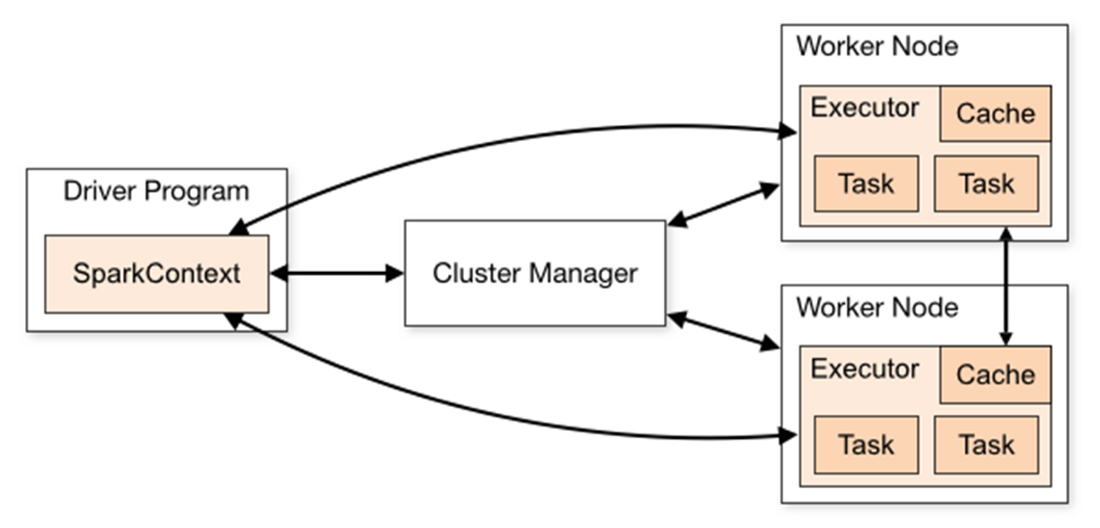

Next, it sends our application code (JAR or Python files to the SparkContext) to the executors. Finally, SparkContext sends tasks to the executors to run.

We will run PySpark in a standalone mode. Standalone cluster is a simple cluster manager included with Spark that makes it easy to set up a cluster.

**Pre-Requisites**

We will need Java JDK installed on our machine. I am on windows, I have installed the windows version. If you want to query or persist data to a database then we will need the Jar files for the appropriate databases. Since I have PostgreSQL and SQL Server, I will download the jars from the maven repository site. Keep in mind that the Jar files must be compatible with your Java version. Last, we need PySpark installed on our machine.

# **Install Pyspark**

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Import Librairies**

**First PySpark App**

Now we are ready to develop our first PySpark application. We will use Jupyter Notebook as our IDE. We import the required libraries at the top.

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, SQLContext
import os

# **Set Java Home**

To run a PySpark application, you would need Java installed. We need to provide the Java location to Spark. For this we will set a Java home variable with os dot environ and provide the Java install directory.

In [ ]:
#set home
os.environ=["JAVA_HOME"]=""

# **Initiate Spark Context**

Next, we will set the configuration for the spark application. A Spark application needs few configuration details in order to run. We can provide the configuration with the help of the SparkConf object we imported from PySpark. We set the application name to “Example”. Master node URL to local and set the location of the Jar files. We are ready to create a Spark context. We utilize the SparkContext object and call the getOrCreate function. To this function we supply the configuration. We call the SparkSession and provide it the Spark Context. We save the session into a variable called spark.

In [ ]:
Conf=SparkConf() \
    .setAppName("Example") \
    .setMaster("local") \
    .set("spark.driver.extraClassPath","C:/pyspark/*")


In [ ]:
sc=SparkContext.getOnCreate(conf=conf)
spark= SparkSession(sc)

In [ ]:
spark

# **Read CSV file**

We can view the spark variable to see the details of our spark application. It displays the configuration details we provided above. Also, we have the link to the Spark UI. We click on the link and explore the Spark UI. We can see all the actions we perform in our application logged here. We will revisit the SQL/Dataframe tab once we create a few DataFrames.

Our spark application is up. Let’s read a csv file with spark. This will read the file into a dataframe. We display the dataframe using the show function.

In [ ]:
df= spark.read.options(delimiter=",",header=True).csv(r"C:\Users\haq\OneDrive\Notebooks\data\AdvWorksData.csv")
df.show()

# **Common dataframe actions**

**DataFrame Operations**

Now we can perform various operations on this dataframe. You can check out the full list on spark website. We can print the schema of the dataframe to see the columns and their data type.

We can filter this dataframe with filter function. Here we are filtering the dataset only for France. We can filter out the data we need for our analysis.

In [ ]:
france= df.filter(df.saleterritory=="France").show(truncate=False)

If we want to focus on a few columns, we can trim the dataframe down by providing a list of columns to the dataframe. This dataframe includes the subset of columns we specified.

In [ ]:
df1=df[['productcategory'],'saleterriory', 'orderDates', 'Sales']
df1.show()

We can also perform aggregate functions such as group by. These are a few examples of data manipulation using Spark dataframe API.

In [ ]:
saleterriory = df.groupBy('saleteorriory').count()
print(saleterriory.show())

# **Use spark SQL to query data**

**Spark-SQL**

We can also run SQL queries against this dataset using Spark SQL. We save the dataframe as a temp view, called sales. And using Spark SQL we can query it with SQL. The output displays records filtered for Caps sub category. We can perform standard SQL operations against this dataset using a distributed engine.

In [ ]:
df.createOrReplaceTempView("sales")
output= spark.sql("SELECT * FROM sales WHERE productsubcategory='caps'")
output.show()

In [ ]:
output = spark.sql('SELECT * from sales WHERE `UnitPrice` > 20 AND OrderQuantity >= 10')
output.show()

In [ ]:
output = spark.sql('SELECT COUNT(*) as total, productcategory from sales GROUP BY productcategory')
output.show()

# **Persist data to database**

**Write to Database**

We can persist this dataset to a database if we want to. We have provided the Jar file for PostgreSQL to the Spark context. We will declare database details along with credentials. We will add a new table called pyspark_sales_table.

We call the write function on dataframe. We provide a few configurations such as the mode (we overwrite the table if it exists) format is jdbc (we provide the jdbc URL, destination table name, user, password and the driver. Finally, we call the save function on it. Once we execute this cell this will save the dataframe to PostgreSQL database.

In [ ]:
dest_tbl = 'public."pyspark_sales_table"'
database = "AdventureWorks"
password = "password"
user = "user"
#
df.write.mode("overwrite") \
    .format("jdbc") \
    .option("url", f"jdbc:postgresql://localhost:5432/{database}") \
    .option("dbtable", dest_tbl) \
    .option("user", user) \
    .option("password", password) \
    .option("driver",  "org.postgresql.Driver") \
    .save()

We have demonstrated how to setup PySpark in standalone mode. We wrote our first PySpark application that reads data from CSV file. We performed DataFrame operations using Pandas API on Spark. In addition, we used Spark-SQL to query the dataset we imported. Finally, we persisted the DataFrame to the PostgreSQL database.

**Conclusion**

We describe what PySpark is and how to configure it locally.
We showcased how easy it is to import and manipulate data using PySpark.
We implemented a basic ETL pipeline using PySpark, Pandas API, and PostgreSQL.